# Gradientinis nusileidimas

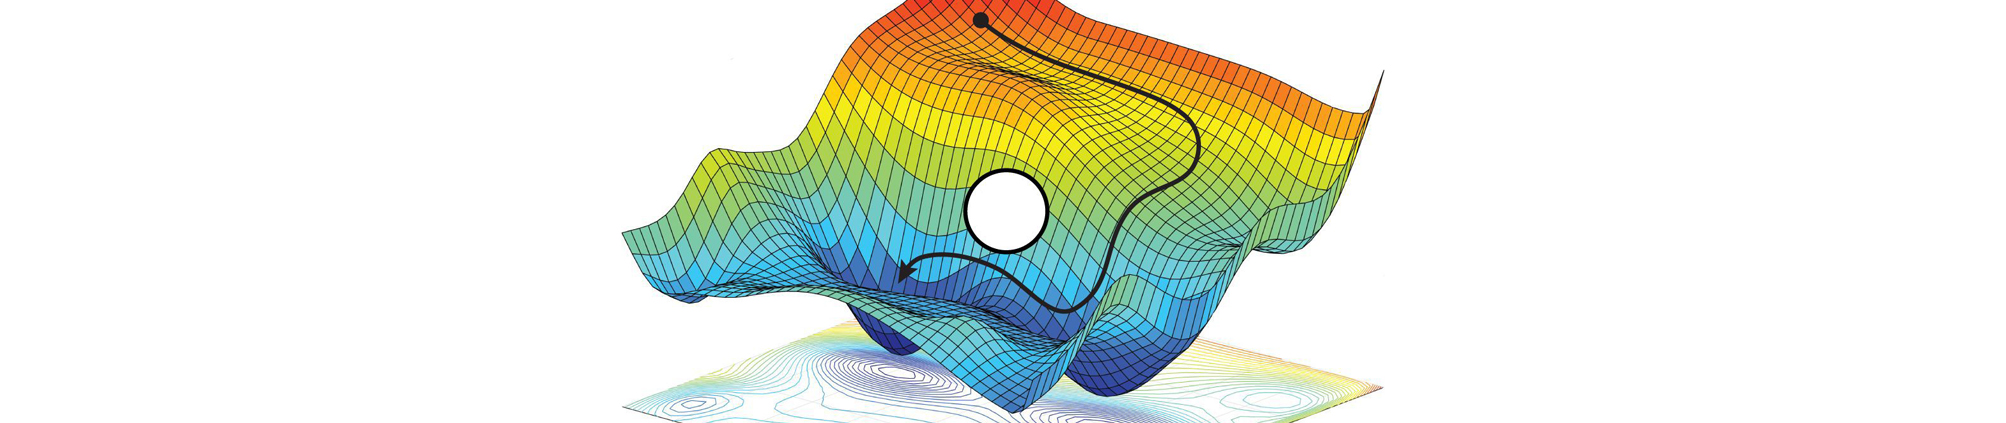

## Temos

<code>**1 : Apibrėžimas, savokos**</code><br>
<code>**2 : Gradiento nusileidimo skaičiavimai**</code><br>
<code>**3 : Gradiento nusileidimo taikymas**</code><br>
<code>**4 : Alpha mokymosi žingsnis**</code><br>

Rekomenduoju pasižiūrėti gerai paruoštą mokomąją medžiagą apie diferencialines ir integralines lygtis.
[The essence of calculcus by 3Blue1Brown](https://www.youtube.com/watch?v=WUvTyaaNkzM&list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)

[Gradientinis nusileidimas](https://lt.wikipedia.org/wiki/Gradientinis_nusileidimas)

Išmoksime atlikti funkcijos minimizavimą gradientiniu nusileidimo metodu. <code>**Gradientinis nusileidimas tai optimizacijos algoritmas, kurį naudosime siekdami sumažinti savo kainos funkciją J**</code>. Tiesą sakant šis algoritmas nėra naudojamas vien tik tiesinei regresijai. <code>**Šis algoritmas fiksuoja visas dalines kelių kintamųjų funkcijos išvestines**</code>. Mes atskirai turėsime trumpą paskaitą apie kelių kintamųjų dalinių išvestinių skaičiavimą. Pirmiausia aptarkime kokios nors funkcijos J sumažinimą, o vėliau paimkime šį algoritmą ir pritaikykime jį konkrečiai kainos funkcijai J, kurią naudojame tiesinės regresijos sistemoje. Darysime prielaidą, kad turime tam tikrą funkciją J su dviem parametrais ir  tai yra kainos funkcija iš mūsų tiesinės regresijos, kurią norime sumažinti. Norime pritaikyti algoritmą, kad sumažinti šią funkciją.

\begin{multline*} 
J(\theta_0, \theta_1,\theta_2, ..., \theta_n)
\end{multline*} 

minimizavimo uždavinys:

\begin{multline*}
\min\theta_0, ..., \theta_n \ \ \ J(\theta_0,...,\theta_n)
\end{multline*}


Gradiento nusileidimas pasirodo esąs labai geras algoritmas sprendžiant šią bendresnę problemą (funkciją turi daug parametrų/kintamųjų). Tačiau paprastuno sumetimais  <code>**apsiribokime taip kad turime tik du parametrus**</code>. Taigi pradėsime nuo kai kurių <code>**pradinių parametrų spėlionių**</code>ir nesvarbu, kokie jie yra, bet įprastas (nebūtinai teisingas) pasirinkimas būtų <code>**nustatyti juos į nulį**</code> Ir gradiento nusileidimo operacijų metu mes  šiek tiek keisime abu parametrus ir bandysime sumažinti J(θ0, θ1) reikšmę, kol galiausiai pasieksime globalų minimumą, o gal ir vietinį minimumą.

<code>**Funkcijos apibrėžimas**</code>:

\begin{multline*}
J(\theta_0, \theta_1)
\end{multline*}

<code>**Mes norime**</code>:
\begin{multline*}
\min_{\theta_0, \theta_1}  \ \ J(\theta_0, \theta_1)
\end{multline*}

<code>**Pradedame nuo pradinių parametrų reikšmių**</code>:
\begin{multline*}
\theta_{0} = \theta_{1} = 0
\end{multline*}

<code>**Keičiame šiuos parametrus kad sumažinti J reikšmę**</code>:
\begin{multline*}
J(\theta_0, \theta_1)
\end{multline*}

<code>**Kol pasiekiame minimaliausią reikšmę**</code>

Bandote sumažinti šią funkciją. Atkreipkitėdi dėmesį į ašis. J funkcijos paviršiaus aukštis rodo kainos reikšmę ir mes norime ją sumažinti. Taigi mes pradedame nuo teta 0 ir teta 1 tam tikru momentu ir  bet kokia šių parametrų reikšmė suteikia jums tam tikrą tašką J paviršiuje. Dabar įsivaizduokite, kad tai tarsi kraštovaizdis su kalvomis ir jūs fiziškai esate ant šios kalvos. <code>**Gradientinis nusileidimas**</code> tai apsisuksime 360°, apsižvalgysime ir <code>**mums norisi kuo greičiau leistis žemyn. Kokia kryptimi turėtumėte žengti tą žingsnį žemyn ? Suradę tą kryptį, ženkime nedidelį žingsnį tam ta kryptimi**</code> Ir dabar jūs esate šiame naujame taške ant kalvos ir kartojate tą patį procesą dar kartą. Ir taip tęsiame, kol priartėsite prie paviršiaus <code>**vietinio minimumo**</code> tada įvyksta <code>**konvergencija**</code> – tai pavadinimas suteiktas situacijai, kai kainos funkcija reikšmingai nepagerėja, o mes įstringame taške, esančiame netoli paviršiaus minimumo.

In [312]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

def hypothesis(X, theta):
    return X @ theta

def cost(X, y, theta):
    m = y.size
    y_hat = hypothesis(X, theta)
    return float(1./(2*m) * (y_hat - y).T @ (y_hat -y))

def gradient(X, y, theta, alpha=0.005, iterations=1000):
    m = y.size
    loss_history, theta_0_history, theta_1_history = [], [], []
    for i in range(iterations):
        y_hat = hypothesis(X, theta)
        theta = theta -alpha * (1/m) * (X.T @ (y_hat -y))
        c = cost(X, y, theta)
        loss_history.append(c)
        theta_0_history.append(theta[0, 0])
        theta_1_history.append(theta[1, 0])
    
    return theta, loss_history, theta_0_history, theta_1_history

In [143]:
x    =  6 * np.random.rand(100, 1) - 2
y    = 1.5 + 0.8 * x + 2*np.random.randn(100, 1)
ones = np.ones(len(x))

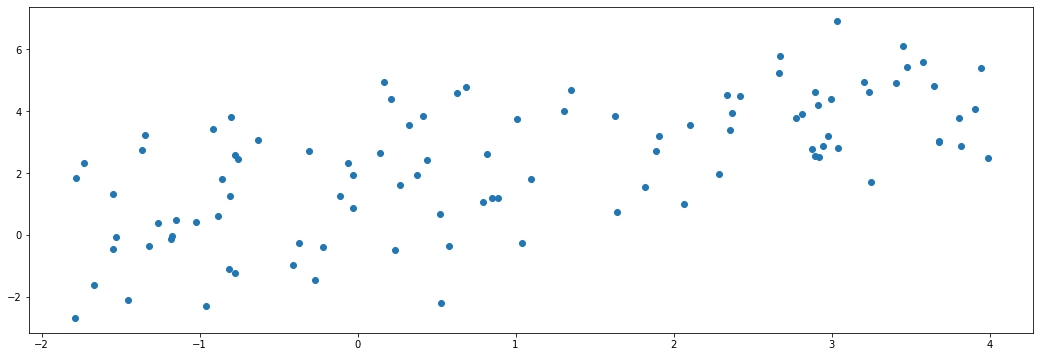

In [144]:
plt.figure(figsize=(18,6))
plt.scatter(x, y)

In [145]:
x.shape, y.shape, ones.shape

((100, 1), (100, 1), (100,))

In [158]:
X = np.vstack(
    (ones, x.flatten())
).T

In [304]:
X.shape , y.shape

((100, 2), (100, 1))

In [163]:
X

array([[ 1.        ,  1.0991624 ],
       [ 1.        , -1.18084259],
       [ 1.        ,  0.16617385],
       [ 1.        ,  3.57736098],
       [ 1.        ,  0.23893616],
       [ 1.        , -0.85549991],
       [ 1.        ,  0.41589864],
       [ 1.        , -1.52897586],
       [ 1.        ,  3.03519531],
       [ 1.        , -1.26165937],
       [ 1.        ,  3.23598412],
       [ 1.        ,  2.99619058],
       [ 1.        ,  3.45233814],
       [ 1.        , -0.30832269],
       [ 1.        ,  0.14442252],
       [ 1.        ,  2.77796503],
       [ 1.        , -0.11081401],
       [ 1.        , -1.02009664],
       [ 1.        ,  1.82243803],
       [ 1.        ,  2.94821465],
       [ 1.        ,  0.43740261],
       [ 1.        ,  2.97818017],
       [ 1.        ,  2.67027476],
       [ 1.        ,  3.48082185],
       [ 1.        , -1.34245705],
       [ 1.        ,  3.98848342],
       [ 1.        ,  1.0378612 ],
       [ 1.        ,  0.79431553],
       [ 1.        ,

In [211]:
T0, T1 = np.meshgrid(np.linspace(-1,5,100),np.linspace(-5,5,100))

In [212]:
t0 = np.ravel(T0)
t1 = np.ravel(T1)

In [256]:
zs = np.array([cost(X, y , np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(t0, t1)]).reshape(T0.shape)

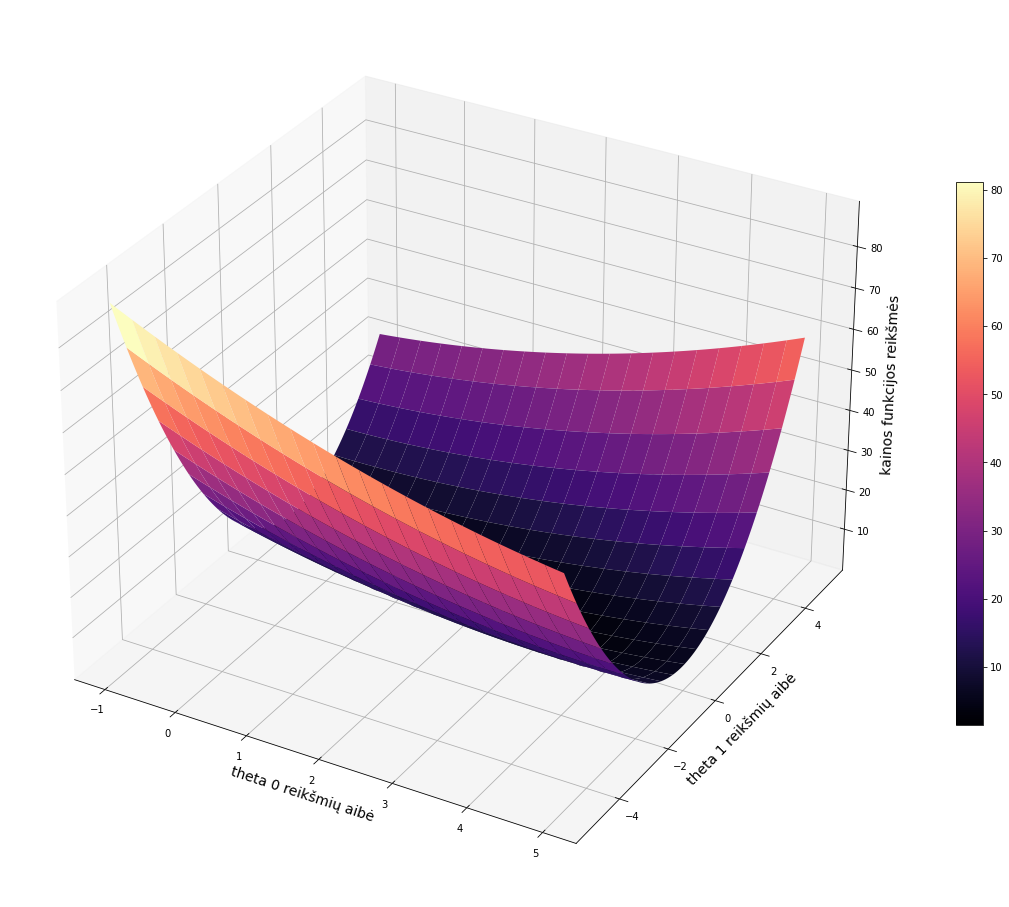

In [311]:
fig  = plt.figure(figsize=(20, 20))
ax   = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, zs, rstride = 5, cstride = 5, cmap='magma')
ax.set_xlabel('theta 0 reikšmių aibė', fontsize=14)
ax.set_ylabel('theta 1 reikšmių aibė', fontsize=14)
ax.set_zlabel('kainos funkcijos reikšmės', fontsize=14)
fig.colorbar(surf, shrink=0.5)

In [258]:
theta_result, loss_history, theta_0_history, theta_1_history = gradient(X,y,np.array([0,-6]).reshape(-1,1),alpha = 0.3,iterations=1000)

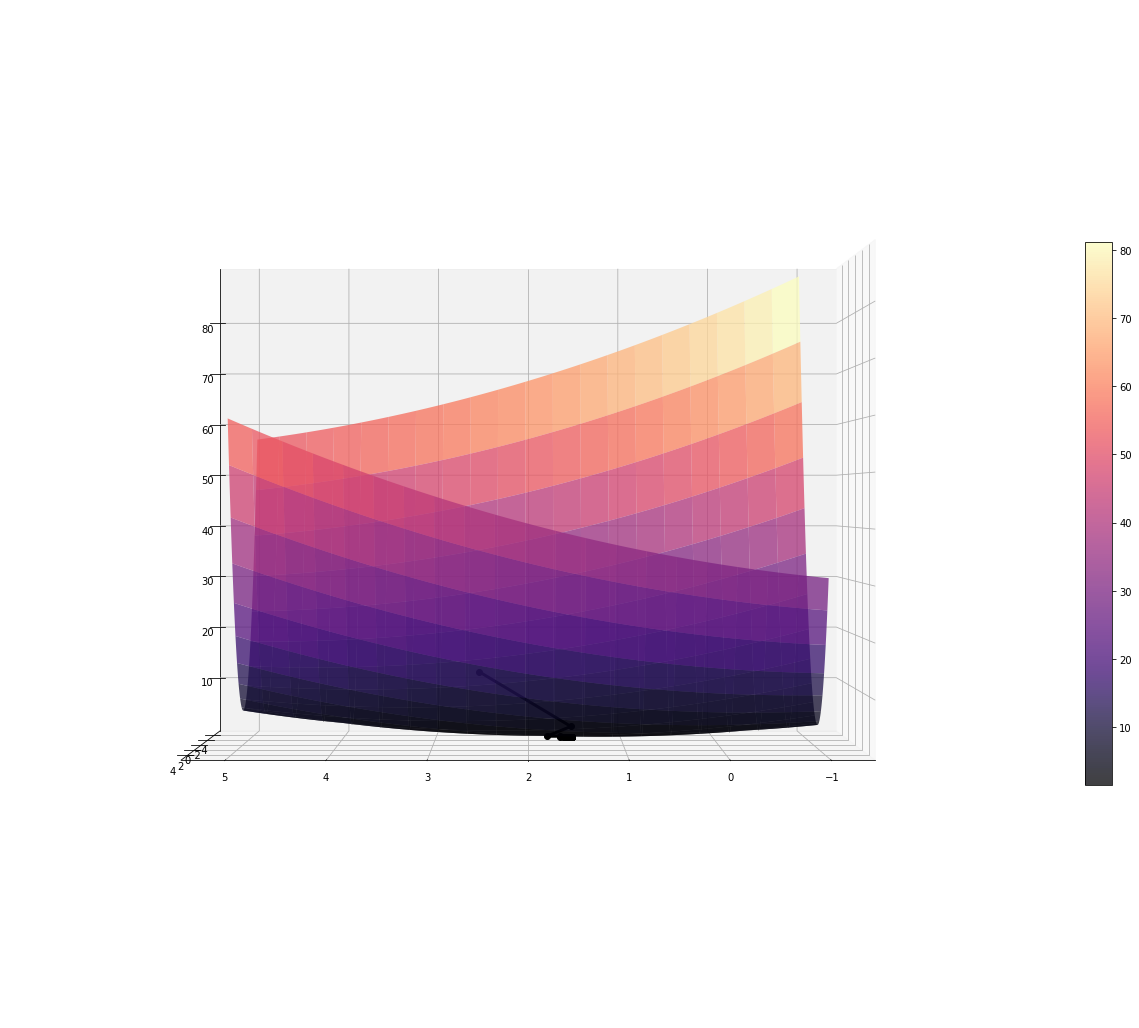

In [303]:
fig  = plt.figure(figsize=(50, 50))
ax   = fig.add_subplot(1, 2, 1,  projection='3d')
grad = ax.plot(theta_0_history, theta_1_history, loss_history, marker='o', linewidth=3, color = 'black', label = 'Gradient descent')
surf = ax.plot_surface(T0, T1, zs, rstride = 5, cstride = 5,alpha=0.75, cmap='magma')
fig.colorbar(surf, shrink=0.2)
ax.view_init(0, 90)

Keičiant θ0 ir θ1 parametrus gauname skirtingas kainos funkcijos J(θ 0, θ 1) reikšmes. Šio paviršiaus aukštis virš θ0 ir θ1 rodo <code>**J(θ 0, θ 1)**</code> reikšmes.
Žemiau esančios kontūro grafiko pavyzdys kuriame ašys yra teta parametrų reikšmes. <br>
<code>**Ir kiekvienas iš ovalų rodo taškų rinkinį, kuris įgauna tą pačią J(θ0, θ1) reikšmę , pažymėjau tris (juodas) x reikšmes, kurios visos turi tą pačią funkcijos J(θ0, θ1) reikšmę**</code>

In [313]:
anglesx = np.array(theta_0_history)[1:] - np.array(theta_0_history)[:-1]
anglesy = np.array(theta_1_history)[1:] - np.array(theta_1_history)[:-1]
Z = zs.reshape(T0.shape)

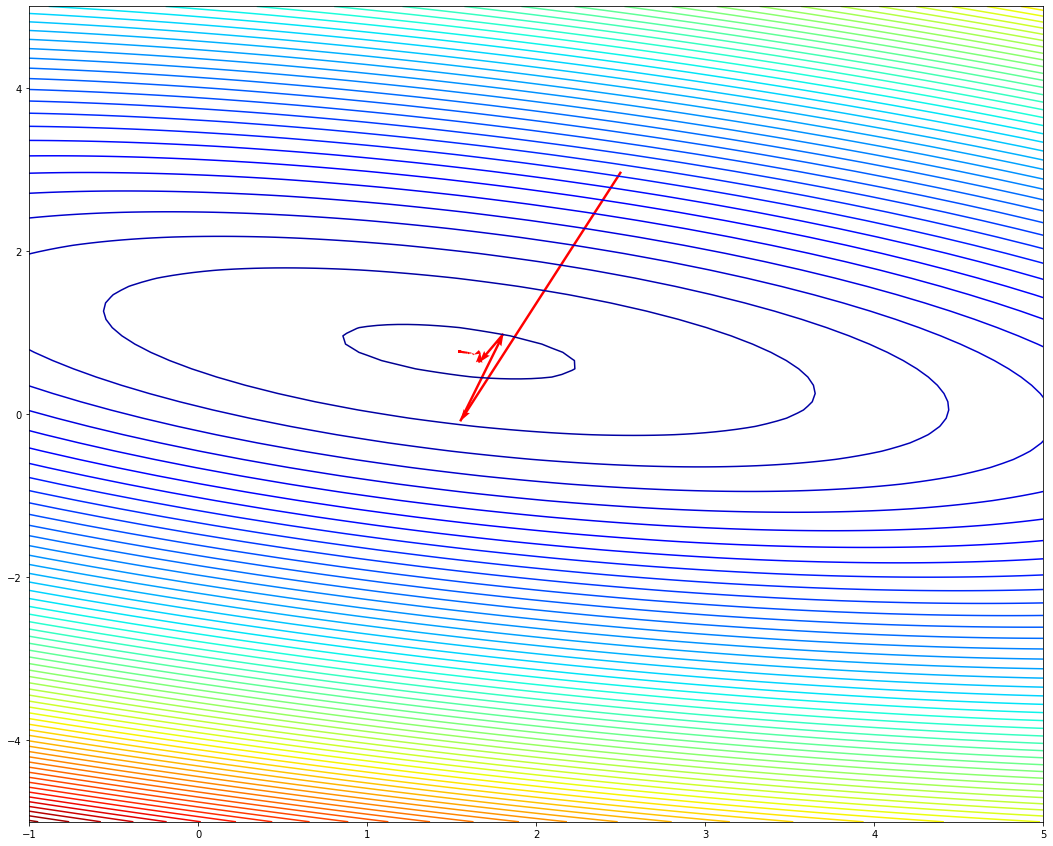

In [326]:
fig  = plt.figure(figsize=(40, 15))
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0_history[:-1], theta_1_history[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = 1)

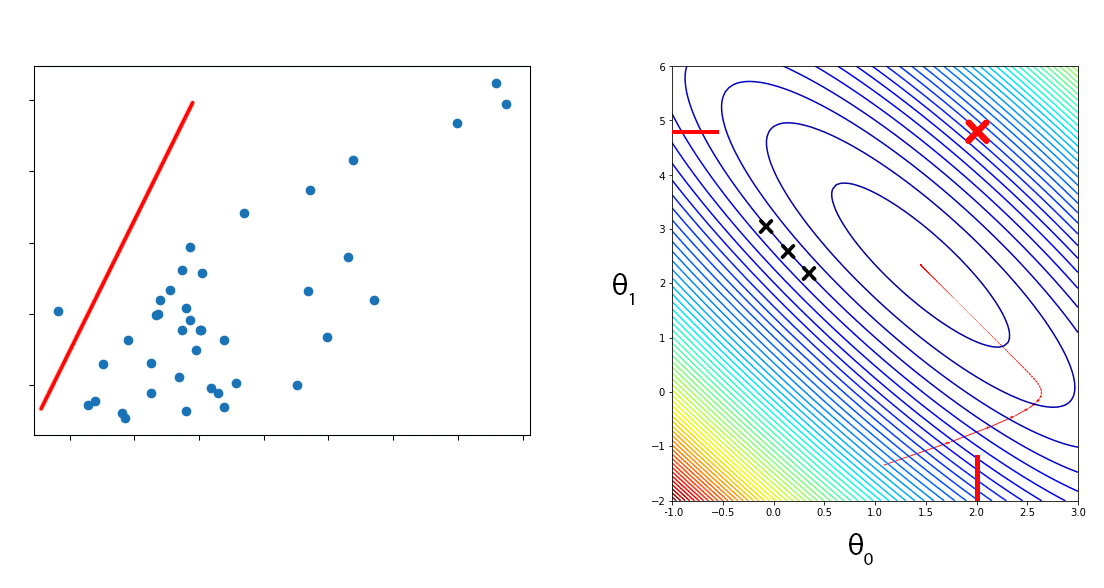

Kai kur theta 0 lygus ~ 2, o theta 1 lygus ~ 4,8. Šis vienas konkretus taškas atitinka vieną teta parametrų porų verčių rinkinį ir atitinka tam tikrą hipotezę (modelį). Galima sakyti kad tai ne geriausiai atitinka duomeys iš duomenų rinkinio. Kadangi šio kombinacijo kaina ten yra gana toli nuo <code>**minimumo**</code>, <code>** ir mums tai per didelė kaina!**</code>
Tačiau galiausiai bandant skirtingas reikšmes kvadratinių paklaidų arba kvadratinių atstumų tarp hipotezės (modelio) ir mokymo pavyzdžių suma priartės prie optimalaus minimumo.

In [3]:
import warningsa
warnings.filterwarnings('ignore')

## Gradiento nusileidimo skaičiavimai

<code>**Tiesinės regresijos modelis su kvadratinės paklaidos funkcija (klaidos funkcija):**</code><br>

\begin{multline*}h_{\theta}(x) = \theta_{0} + \theta_{1}x \end{multline*} <br>
\begin{multline*}J(\theta_{0}, \theta_{1}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2\end{multline*}

<code>**Gradientinis nusileidimas**</code><br>

`turime kartoti iki konvergencijos (for j = 0 and j = 1){`


\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1})
\end{multline*}

`}`

Šioje lygtyje yra keletas detalių, jos dalis:<br>
* <code>**:= yra reikšmės priskyrimas, jei a:=b, reiškia, kad rinkinys a yra lygus b reikšmei**</code><br>
* <code>**α yra skaičius, vadinamas mokymosi žingsnis, iš esmės jis valdo, kokio didumo žingsnį žengiame žemyn**</code><br>

* <code>**dalinė išvestinė** </code>\begin{multline*} \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1}) \end{multline*}

šis terminas yra dalinė išvestinė, jei nesate susipažinę su jų skaičiavimu, nesijaudinkite, mes jį peržiūrėsime atskirai <code>**papildomose paskaitose apie diferencialinį skaičiavimą**</code> bet iš esmės  
<code>**išvestinė yra funkcijos pokyčio greitis arba nuolydis tam tikrame taške**</code>

GD mes naujinsime(keisime) theta parametrus ir turime <code>**tai daryti vienu metu**</code>

\begin{multline*}
temp_{0} := \theta_{0} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1}) 
\end{multline*}
\begin{multline*}
temp_{1} := \theta_{1} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1})
\end{multline*}
\begin{multline*}
\theta_{0} := temp_{0} \newline
\end{multline*}
\begin{multline*}
\theta_{1} := temp_{1} \newline
\end{multline*}

Gana sudėtinga paaiškinti, kodėl turime tai daryti vienu metu, bet tai priklauso nuo būdo, kaip veikia GD, į tai gilinsimės vėliau. Daryti vienu metu vykstančius parametrų naujinimus turime labiau nuspėjama veikimą , jis vis tiek veiks ir nedaramt atnaujinimu vienu metu, tačiau dėl to algoritmas elgsis keistai.

Turime išsiaiškinti, koks yra šios funkcijos J dalinės išvestinės terminas. Atlikus skaičiavimus paaiškėja, kad:

\begin{multline*}
\dfrac{\partial}{\partial\theta_{j}} J(\theta_{0}, \theta_{1}) = \dfrac{\partial}{\partial \theta_{j}} \cdot   \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2\ = \dfrac{\partial}{\partial\theta_{j}} \cdot \dfrac{1}{2m}\sum_{i=1}^{m}( \theta_{0} + \theta_{1} x^{(i)} -y^{(i)})^2
\end{multline*}

Mes turėsime įtraukti hipotezės apibrėžimą  į lygti ir atliksime skaičiavimus kai J = 0 ir J = 1. Rezultatus gauname tokius:

\begin{multline*}
\theta_{0} = 0: \dfrac{\partial}{\partial\theta_{0}} J(\theta_{0}, \theta_{1}) = \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = 1: \dfrac{\partial}{\partial\theta_{1}} J(\theta_{0}, \theta_{1}) =  \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}

<div class="alert alert-block alert-info">
<h2>Dalinės išvestinės ➜ su keliais kintamaisiais</h2>

\begin{multline*}
z = f(x,y) = 3x^{2} + 2xy + 3y^{2} + 2x^{3}y
\end{multline*}

<br>    
Kaip <b>z</b> kinta tik santykinai su x ar tik santykinai su y ? Tai žinoma kaip <b>dalinė išvestinė</b>. <br>
Mes ieškome:

\begin{multline*}
\dfrac{\partial z}{\partial x} =  6x + 2y + 6yx
\end{multline*}

\begin{multline*}
\dfrac{\partial z}{\partial y} = 2x + 3y^{2} + 9x^{2}
\end{multline*} 
    
### Kėlimo laipsniu taisyklė (power rule)

\begin{multline*}
y = x^{n}
\end{multline*}

\begin{multline*}
\dfrac{dy}{dx} = n \times x^{n-1}
\end{multline*}

\begin{multline*}
f(x) = x^{2}
\end{multline*}

\begin{multline*}
f(x)’ = 2x
\end{multline*}
    
</div>

Apskaičiuojant šias dalines išvestis, pereinant nuo vienos lygties prie supaprastintu išraišku, reikia atlikti <code>**daugiamatį skaičiavimą**</code>. Jei taip atsitiks, kad esate mažiau susipažinęs su šių skaičiavimu tecnika nesijaudinkite. Visiškai gerai paimti šias lygtis <code>**, kurios yra tik kainos funkcijos J**</code> nuolydis, kurias mes sukūrėme, ir naudoti ją taikant gradiento nusileidimo lygtį. Prijunkime dalines išvestines prie gradiento nusileidimo algoritmo:

`kartoti iki konvergencijos{`
\begin{multline*}
\theta_{0} := \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}
`}`

Tai yra tiesinės regresijos gradiento nusileidimas, kuris kartojasi iki konvergencijos, theta parametrai atnaujinami po kiekvieno alfa ir išvestinio termino atėmimo. <code>**Taikydami gradiento nusileidimą nepamirškite, kad visda turime tuo pačiu metu atnaujinti theta parametrus**</code>

Pažiūrėkime, kaip tai veikia. Yra viena problema susijusi su gradiento nusileidimu, kad jis gali būti jautrus vietiniam optimalumui (vietiniam minimumui), kuris priklauso nuo to, kokios reikšmės inicijuojate theta parametrus. Galime pasiekti skirtingus vietinius optimalius variantus. Tačiau tiesinės regresijos kainos funkcija visada* bus <code>**[išgaubta - convex](https://en.wikipedia.org/wiki/Convex_function) (dubens formos funkcija), kuri neturi jokių vietinių minimumų, išskyrus vienintelis globalų minumumą ir gradiento nusileidimas visada susilygins su globaliu optimalumu (jei tik lauksime pakankamai ilgai ir mokymosi žignis alfa nėra toks kad būtų daromi per didelis žingsnis !).**</code>

## Gradiento nusileidimo taikymas

In [230]:
import numpy as np
import matplotlib.pyplot as plt

In [231]:
x = np.array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11]) 
y = np.array([1, 2, 3, 1, 4, 5, 6, 4, 7, 10, 15,  9])

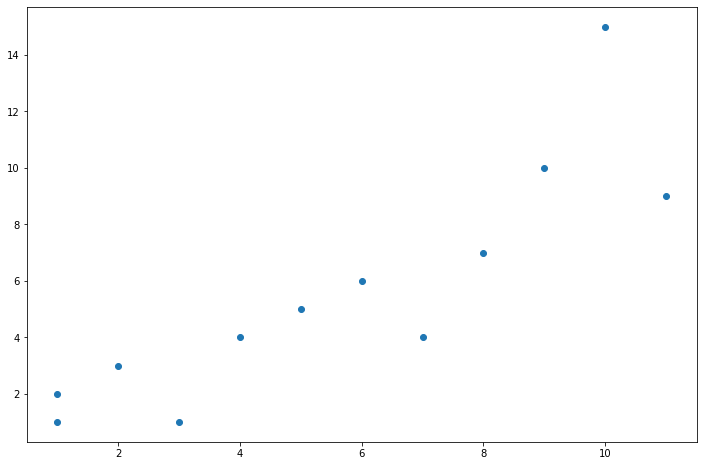

In [233]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y);

<br>

\begin{multline*}
\hat{y} = h_{\theta}(x) = \theta_{0} + \theta_{1}x
\end{multline*}

<br>

In [234]:
def hypothesis(th0, th1):
    return th0 + th1 * x

In [235]:
y_hat = hypothesis(0, 0)

In [237]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

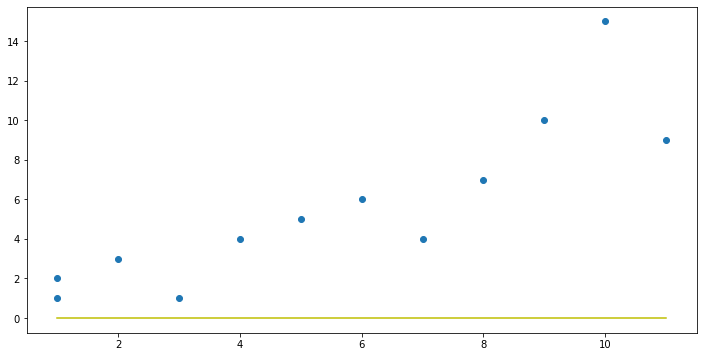

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(x, y_hat , c='y')
plt.scatter(x, y);

<div class="alert alert-block alert-info">
<h2>TODO</h2>
parodyk python <b>list comprehension</b> ir <b>ciklo</b> paaiškinimą.
</div

\begin{multline*}
J(\theta_0, \theta_1) = \dfrac{1}{2m} \sum_{i = 1}^{m} (\hat{y} - y^{i})^2
\end{multline*}

In [253]:
print(x.ndim)
print(x.shape)
print(x.size)

1
(12,)
12


In [255]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [254]:
def J(x, y_hat):
    m = x.size
    return ( 1 / (2*m) ) * sum( [ residual**2 for residual in (y_hat -y) ] )  

In [256]:
cost = J(x, y_hat)
print(cost)

23.458333333333332


TODO: pataisyti finalines eilutes

\begin{multline*}
\theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_{j}}J(\theta_{j})
\end{multline*}

\begin{multline*}
\dfrac{\partial}{\partial \theta_{j}}J(\theta_{j})
\end{multline*}

\begin{multline*}
\theta_{0} = 0: \dfrac{\partial}{\partial\theta_{0}} J(\theta_{0}, \theta_{1}) = \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = 1: \dfrac{\partial}{\partial\theta_{1}} J(\theta_{0}, \theta_{1}) =  \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}

\begin{multline*}
\theta_{0} := \theta_{0} - \alpha \ \times \  \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \ \times \ \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}

In [257]:
def gradient(th0, th1, y_hat): 
    m = x.size
    theta_0_derived  = (1/m) * sum((y_hat - y ))
    theta_1_derived  = (1/m) * sum((y_hat  -y) * x) 
    th0 -= alpha * theta_0_derived
    th1 -= alpha * theta_1_derived
    return th0, th1

In [279]:
alpha  = 0.005
epochs = 20
cost   = []
th0    = 0
th1    = 0

In [280]:
for i in range(epochs):
    print(f" on iteration: {i}, th0 value:{th0}, th1 value:{th1}")
    y_hat = hypothesis(th0, th1)
    th0, th1 = gradient(th0, th1, y_hat)
    cost.append(J(x, y_hat))

 on iteration: 0, th0 value:0, th1 value:0
 on iteration: 1, th0 value:0.027916666666666666, th1 value:0.21333333333333332
 on iteration: 2, th0 value:0.04973819444444444, th1 value:0.38082065972222223
 on iteration: 3, th0 value:0.06677492672164351, th1 value:0.5123171040943287
 on iteration: 4, th0 value:0.08005553293206862, th1 value:0.6155593158167559
 on iteration: 5, th0 value:0.09038755770085717, th1 value:0.6966208600561127
 on iteration: 6, th0 value:0.09840495423578641, th1 value:0.7602697173834433
 on iteration: 7, th0 value:0.10460539985431969, th1 value:0.8102489346137751
 on iteration: 8, th0 value:0.1093795900970802, th1 value:0.8494969464306821
 on iteration: 9, th0 value:0.11303423572540493, th1 value:0.880320536273657
 on iteration: 10, th0 value:0.11581011624247164, th1 value:0.9045306172385128
 on iteration: 11, th0 value:0.11789625259668414, th1 value:0.9235488252684413
 on iteration: 12, th0 value:0.11944103329495673, th1 value:0.9384911988788256
 on iteration: 13

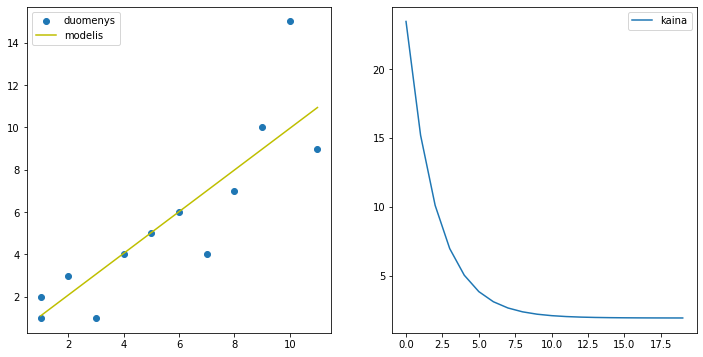

In [281]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].scatter(x,y, label='duomenys')
ax[0].plot(x, y_hat, c='y', label='modelis')
ax[1].plot(range(epochs), cost, label='kaina')
ax[0].legend()
ax[1].legend()

## Alpha mokymosi žingsnis

Apskaičiuodami šią išvestinę (liestinę) konkrečiame taške galima įvertinti šios liestinės linijos nuolydį. Ir jei ši linija turi teigiamą nuolydį, nes teigiamą išvestinę algoritmas žino į kurią pusę reikės dėti žingsnį. Taigi mūsų theta atnaujinimas bus toks:

\begin{multline*}
\theta_{1} := \theta_{1} - \alpha \ \ (\text{teigiamas skaičius})
\end{multline*}

Kol kas atrodo, kad GD elgiasi teisingai. Panagrinėkime kitą pavyzdį su panašiomis sąlygomis, išskyrus tai, kad mūsų parametras buvo inicijuotas kitoje vietoje. Dabar mūsų išvestinės terminas, įvertintas šiame taške, bus liestinė kurios nuolydis yra neigiamas arba galime sakyti, kad ši funkcija turi neigiamą išvestinę tame taške. Taigi mūsų theta atnaujinimas bus toks:

\begin{multline*}
\theta_{1} := \theta_{1} - \alpha \ \ (\text{neigiamas skaičius})
\end{multline*}

Taigi mes turime theta atėmus kažokį neigiamą skaičių, o tai reiškia, kad ketiname padidinti theta reikšme, o tai atrodo teisingas žingsnis, kad priartėtume prie minimumo.


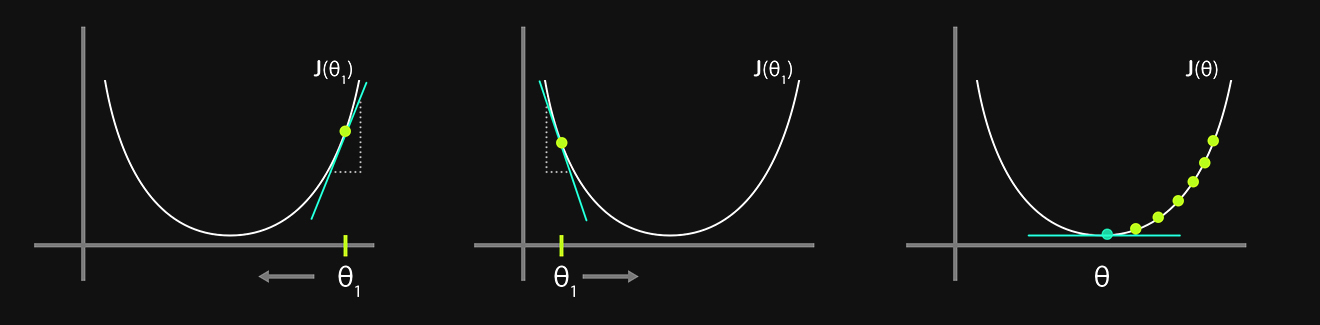

Jau turime tam tikrą intuiciją ką daro ši išvestinė priemonė. Dabar pažvelkime į alfa `𝛼` mokymosi žignis ir jo veikimą.

\begin{multline*}
\theta_{1} : = \theta_{1} - \alpha \dfrac{\partial}{\partial \theta_{1}}J(\theta_{1})
\end{multline*}

Jei alfa yra per mažas, GD bus lėtas. Ir mums reikės daug žingsnių, kol jis priartės prie globalaus minimumo.
Jei jis yra per didelis, GD gali peršokti minimumą, nesugebės priartėti, net net nukryps. Tarkime, pradedame kažkur netoli minimumo. Taigi išvestinis taškas į dešinę, bet alfa yra per didelis, tai žengs didžiulį žingsnį ir dar labiau nutols ir situaciją pablogės. Po antrojo žingsnio išvestinių taškų kairėje, tai rodys, kad theta turėtų mažėti, bet mūsų mokymosi žignis yra per didelis, todėl žengs dar vieną didžiulį žingsnį ir pan. Situacija kada GD eina tik toliau nuo minimumo.

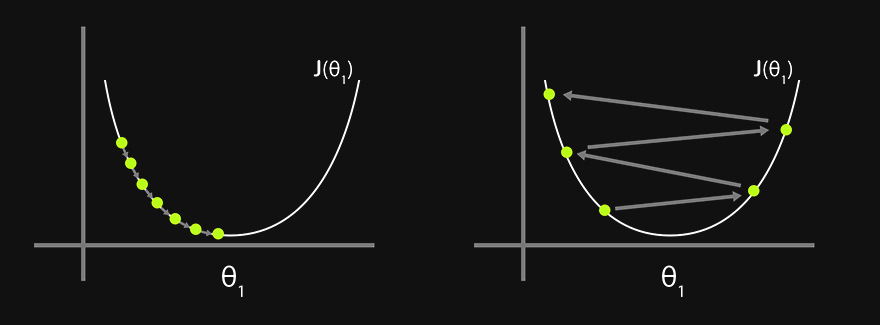

Žinome, kad kai mokymosi žignis yra per mažas, reikės daug žingsnių, kad konverguotu. Kita vertus, kai mokymosi žingnis yra per didelis GD nepasiekia minimumo, kaip matyti toliau pateiktoje vizualizacijoje

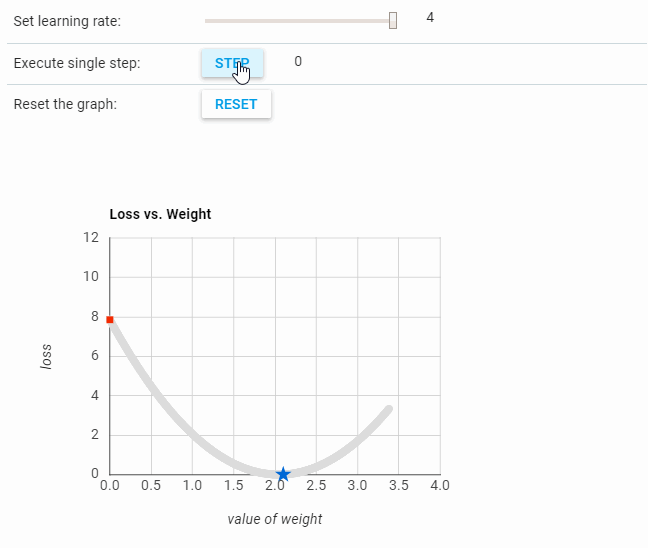

<div class="alert alert-block alert-success">
<h2>Klasės pratimas</h2>
    
 Kas jeigu <code>**theta reiškmė yra tokia kad jau esame lokaliame minumume**</code>, kaip galvojate ką vienu žingsniu GD darys ?
</div>




Gradiento nusileidimo algoritmas gali būti naudojamas bandant optimizuoti bet kokią kainos funkciją J, o ne tik tą, kurią apibrėžėme tiesinei regresijai.  Taigi, sujungus į gradiento nusileidimo ir kainos funkciją tai bus mūsų pirmasis jūsų<code>**algoritmas kuris mokosi**</code>